# Phân Tích Dữ Liệu Phòng Cấp Cứu (ER) Bệnh Viện

**Mục tiêu:** Notebook này phân tích dữ liệu bệnh nhân tại phòng cấp cứu để tìm ra các thông tin chi tiết về đặc điểm nhân khẩu học, thời gian chờ, và tỷ lệ nhập viện.

In [47]:
# === 1. THIẾT LẬP & NHẬP THƯ VIỆN ===

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cài đặt theme cho seaborn để biểu đồ đẹp hơn
sns.set_theme(style="whitegrid")

print("Các thư viện đã được nhập thành công!")

Các thư viện đã được nhập thành công!


## 2. Tải và Làm sạch Dữ liệu

Trong phần này, chúng ta sẽ tải dữ liệu, chuẩn hóa tên cột và chuyển đổi các kiểu dữ liệu cho phù hợp để phân tích.

In [48]:
# === 2.1. Tải dữ liệu và Chuẩn hóa tên cột ===

# Đọc dữ liệu từ file CSV
df = pd.read_csv('Hospital ER_Data.csv')

# Chuẩn hóa tên cột:
# - .str.strip(): Loại bỏ khoảng trắng thừa ở đầu và cuối.
# - .str.lower(): Chuyển thành chữ thường.
# - .str.replace(' ', '_'): Thay thế khoảng trắng bằng dấu gạch dưới.
# -> Giúp việc truy cập các cột dễ dàng và nhất quán hơn.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Hiển thị 2 dòng đầu tiên để xem trước dữ liệu và tên cột mới
df.head(2)

,patient_id,patient_admission_date,patient_first_inital,patient_last_name,patient_gender,patient_age,patient_race,department_referral,patient_admission_flag,patient_satisfaction_score,patient_waittime,patients_cm
0,145-39-5406,20-03-2024 08:47,H,Glasspool,M,69,White,NaN,False,10.0,39,0
1,316-34-3057,15-06-2024 11:29,X,Methuen,M,4,Native American/Alaska Native,NaN,True,NaN,27,0


In [49]:
# === 2.2. Xử lý kiểu dữ liệu ===

# Chuyển đổi cột 'patient_admission_date' sang định dạng datetime.
# Thêm `dayfirst=True` để xử lý đúng định dạng DD-MM-YYYY và loại bỏ cảnh báo.
df['patient_admission_date'] = pd.to_datetime(df['patient_admission_date'], dayfirst=True, errors='coerce')

# Chuyển đổi cột 'patient_satisfaction_score' sang dạng số.
# `errors='coerce'` sẽ biến các giá trị không phải số thành NaN (Not a Number).
df['patient_satisfaction_score'] = pd.to_numeric(df['patient_satisfaction_score'], errors='coerce')

# Chuyển đổi cột 'patient_admission_flag' sang kiểu boolean (True/False) một cách an toàn.
# Dùng .astype(bool) trực tiếp có thể không như ý muốn nếu cột có các giá trị khác.
# Cách này đảm bảo chỉ có 'True' (không phân biệt hoa thường) mới là True.
df['patient_admission_flag'] = df['patient_admission_flag'].astype(str).str.lower() == 'true'

# Hiển thị thông tin sau khi chuyển đổi để kiểm tra
print("--- Dữ liệu sau khi xử lý ---")
df.info()

--- Dữ liệu sau khi xử lý ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   patient_id                  9216 non-null   object        
 1   patient_admission_date      9216 non-null   datetime64[ns]
 2   patient_first_inital        9216 non-null   object        
 3   patient_last_name           9216 non-null   object        
 4   patient_gender              9216 non-null   object        
 5   patient_age                 9216 non-null   int64         
 6   patient_race                9216 non-null   object        
 7   department_referral         3816 non-null   object        
 8   patient_admission_flag      9216 non-null   bool          
 9   patient_satisfaction_score  2517 non-null   float64       
 10  patient_waittime            9216 non-null   int64         
 11  patients_cm               

## 3. Khám phá Dữ liệu (Exploratory Data Analysis - EDA)

Thực hiện các bước kiểm tra tổng quan để hiểu rõ hơn về cấu trúc, sự phân bố và các giá trị thiếu trong dữ liệu.

In [50]:
# === 3.1. Kiểm tra dữ liệu tổng quan ===

# Kích thước của DataFrame (số dòng, số cột)
print(f"Kích thước dữ liệu: {df.shape[0]} dòng và {df.shape[1]} cột")

# Kiểm tra dữ liệu trùng lặp
if df.duplicated().any():
    print("Phát hiện có dòng dữ liệu bị trùng lặp.")
else:
    print("Không có dòng dữ liệu nào bị trùng lặp.")

# Thống kê mô tả cho các cột số
print("\n--- Thống kê mô tả (dữ liệu số) ---")
display(df.describe())

# Đếm các giá trị thiếu trong mỗi cột
print("\n--- Số lượng giá trị thiếu (Null/NaN) theo cột ---")
print(df.isnull().sum())

Kích thước dữ liệu: 9216 dòng và 12 cột
Không có dòng dữ liệu nào bị trùng lặp.

--- Thống kê mô tả (dữ liệu số) ---


,patient_admission_date,patient_age,patient_satisfaction_score,patient_waittime,patients_cm
count,9216,9216.000000,2517.000000,9216.000000,9216.000000
mean,2024-01-16 14:21:23.372395776,39.855143,4.992054,35.259874,0.052083
min,2023-04-01 01:13:00,1.000000,0.000000,10.000000,0.000000
25%,2023-08-24 14:19:30,20.000000,2.000000,23.000000,0.000000
50%,2024-01-17 06:50:30,39.000000,5.000000,35.000000,0.000000
75%,2024-06-09 11:55:15,60.000000,8.000000,48.000000,0.000000
max,2024-10-30 23:44:00,79.000000,10.000000,60.000000,1.000000
std,NaN,22.755125,3.138043,14.735323,0.222207



--- Số lượng giá trị thiếu (Null/NaN) theo cột ---
patient_id                       0
patient_admission_date           0
patient_first_inital             0
patient_last_name                0
patient_gender                   0
patient_age                      0
patient_race                     0
department_referral           5400
patient_admission_flag           0
patient_satisfaction_score    6699
patient_waittime                 0
patients_cm                      0
dtype: int64


### Thảo luận về Dữ liệu thiếu

- **department_referral**: Có `5400` giá trị thiếu (chiếm ~58.6%). Điều này có thể là do không phải tất cả bệnh nhân ER đều cần được giới thiệu đến khoa khác. Chúng ta có thể điền giá trị thiếu này bằng "Unknown" hoặc "Not Referred".
- **patient_satisfaction_score**: Có `6699` giá trị thiếu (chiếm ~72.7%). Đây là một tỷ lệ rất lớn. Có thể do bệnh viện chỉ khảo sát một phần bệnh nhân hoặc không phải ai cũng trả lời. Việc điền giá trị trung bình/trung vị có thể làm sai lệch phân tích. Tạm thời chúng ta sẽ thực hiện phân tích trên các giá trị không thiếu.

*Tạm thời, chúng ta sẽ không thực hiện thay đổi nào với các giá trị thiếu này mà sẽ lưu ý khi phân tích.*

## 4. Phân tích và Trực quan hóa Dữ liệu

Trong phần này, chúng ta sẽ đi sâu vào việc phân tích các khía cạnh khác nhau của dữ liệu và trực quan hóa chúng để tìm ra insights.

In [51]:
# === 4.1. CÁC CHỈ SỐ TỔNG QUAN (KPIs) ===

print("\n--- CÁC CHỈ SỐ TỔNG QUAN (KPIs) ---\n")

# 1. Tổng số lượt bệnh nhân (có thể có bệnh nhân quay lại)
total_visits = len(df)
print(f"1. Tổng số lượt khám: {total_visits}")

# 2. Tổng số bệnh nhân duy nhất
total_unique_patients = df['patient_id'].nunique()
print(f"2. Tổng số bệnh nhân duy nhất: {total_unique_patients}")

# 3. Tuổi trung bình của bệnh nhân
average_age = round(df['patient_age'].mean(), 1)
print(f"3. Tuổi trung bình của bệnh nhân: {average_age}")

# 4. Mức độ hài lòng trung bình (chỉ tính trên các giá trị có sẵn)
average_satisfaction = round(df['patient_satisfaction_score'].mean(), 2)
print(f"4. Mức độ hài lòng trung bình: {average_satisfaction}")

# 5. Thời gian chờ trung bình
average_wait_time_mins = round(df['patient_waittime'].mean(), 2)
print(f"5. Thời gian chờ trung bình: {average_wait_time_mins} phút")


--- CÁC CHỈ SỐ TỔNG QUAN (KPIs) ---

1. Tổng số lượt khám: 9216
2. Tổng số bệnh nhân duy nhất: 9216
3. Tuổi trung bình của bệnh nhân: 39.9
4. Mức độ hài lòng trung bình: 4.99
5. Thời gian chờ trung bình: 35.26 phút


### 4.2. Phân tích theo Nhân khẩu học (Giới tính, Chủng tộc, Tuổi)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24584\1240044834.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patients_by_gender.index, y=patients_by_gender.values, palette='pastel', ax=axes[0], edgecolor='black')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24584\1240044834.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=patients_by_race.index, x=patients_by_race.values, palette='viridis', ax=axes[1], edgecolor='black')


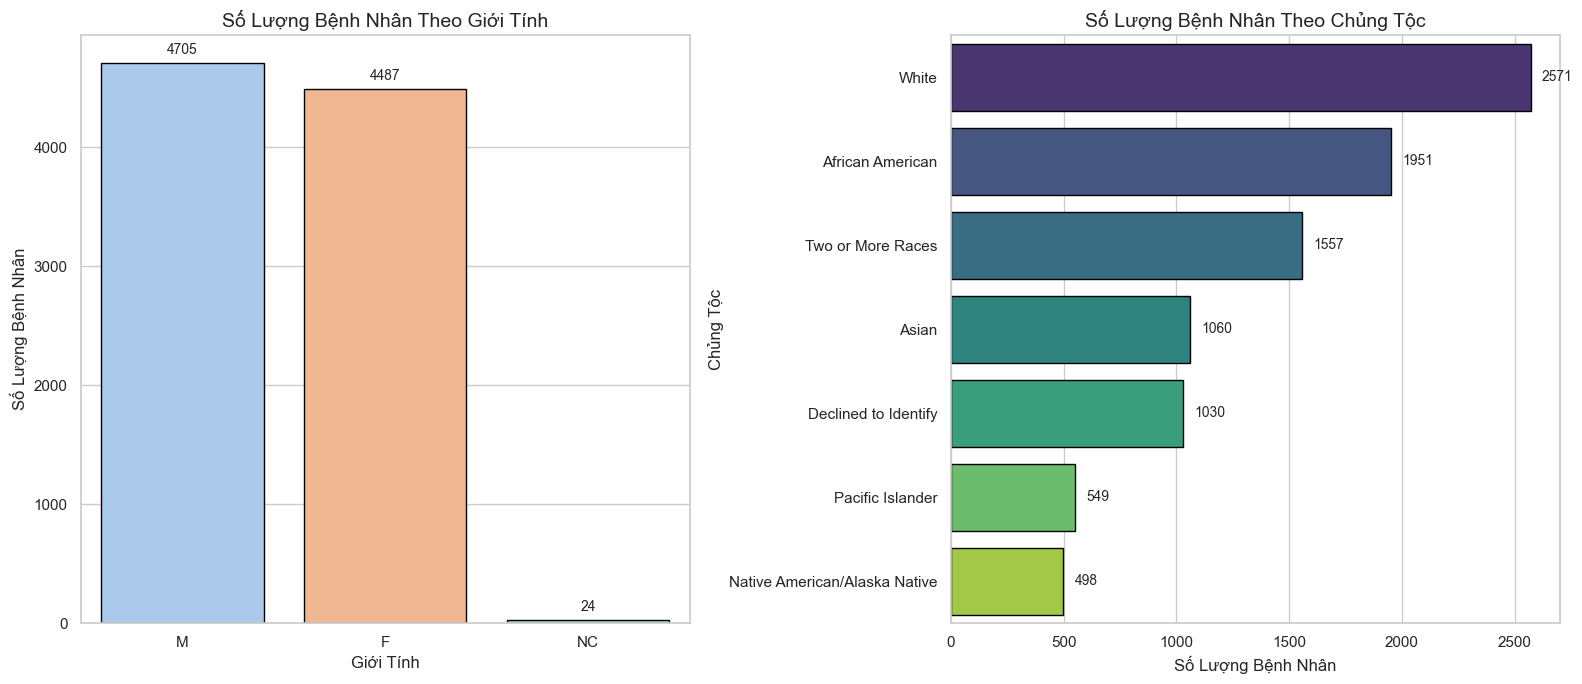

In [52]:
# === BIỂU ĐỒ VỀ GIỚI TÍNH VÀ CHỦNG TỘC ===

# Thiết lập layout cho 2 biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 1. Biểu đồ cột: Số lượng bệnh nhân theo Giới tính
patients_by_gender = df['patient_gender'].value_counts()
sns.barplot(x=patients_by_gender.index, y=patients_by_gender.values, palette='pastel', ax=axes[0], edgecolor='black')
axes[0].set_title('Số Lượng Bệnh Nhân Theo Giới Tính', fontsize=14)
axes[0].set_xlabel('Giới Tính', fontsize=12)
axes[0].set_ylabel('Số Lượng Bệnh Nhân', fontsize=12)

# Thêm nhãn số liệu cho biểu đồ giới tính
for index, value in enumerate(patients_by_gender):
    axes[0].text(index, value + 50, str(value), ha='center', va='bottom', fontsize=10)

# 2. Biểu đồ cột ngang: Số lượng bệnh nhân theo Chủng tộc
patients_by_race = df['patient_race'].value_counts()
sns.barplot(y=patients_by_race.index, x=patients_by_race.values, palette='viridis', ax=axes[1], edgecolor='black')
axes[1].set_title('Số Lượng Bệnh Nhân Theo Chủng Tộc', fontsize=14)
axes[1].set_xlabel('Số Lượng Bệnh Nhân', fontsize=12)
axes[1].set_ylabel('Chủng Tộc', fontsize=12)

# Thêm nhãn số liệu cho biểu đồ chủng tộc
for index, value in enumerate(patients_by_race):
    axes[1].text(value + 50, index, str(value), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24584\3796204446.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=patients_by_age_group.index, y=patients_by_age_group.values, palette='plasma', edgecolor='black')


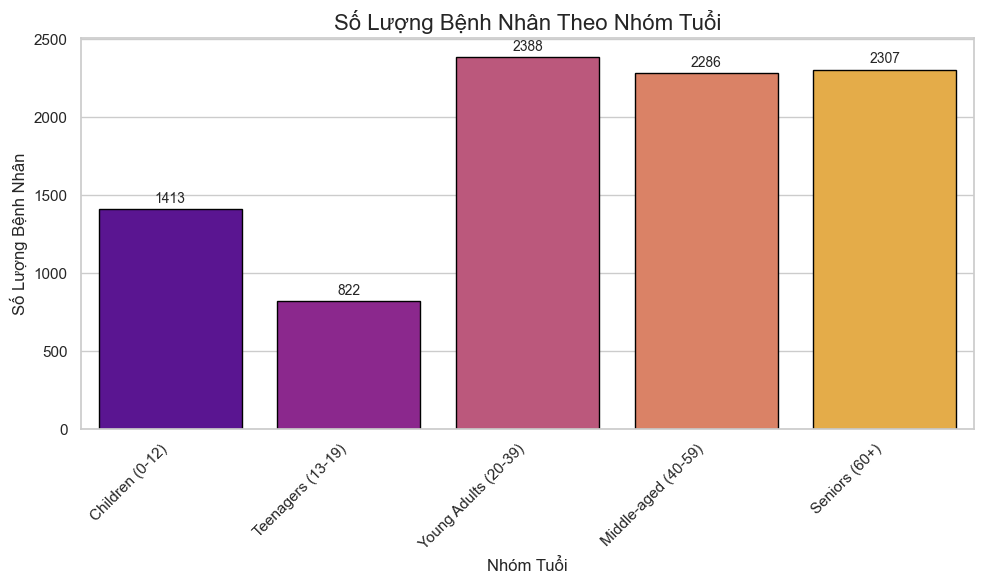

In [53]:
# === BIỂU ĐỒ VỀ NHÓM TUỔI ===

# Phân nhóm tuổi cho bệnh nhân
age_bins = [-1, 12, 19, 39, 59, 100] # Phân nhóm hợp lý hơn: Nhi đồng, Vị thành niên, Thanh niên, Trung niên, Cao niên
age_labels = ['Children (0-12)', 'Teenagers (13-19)', 'Young Adults (20-39)', 'Middle-aged (40-59)', 'Seniors (60+)']
df['age_group'] = pd.cut(df['patient_age'], bins=age_bins, labels=age_labels, right=True)
patients_by_age_group = df['age_group'].value_counts().reindex(age_labels)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=patients_by_age_group.index, y=patients_by_age_group.values, palette='plasma', edgecolor='black')
plt.title('Số Lượng Bệnh Nhân Theo Nhóm Tuổi', fontsize=16)
plt.xlabel('Nhóm Tuổi', fontsize=12)
plt.ylabel('Số Lượng Bệnh Nhân', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Thêm nhãn số liệu
for index, value in enumerate(patients_by_age_group):
    ax.text(index, value + 20, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 4.3. Phân tích theo Khoa và Tình trạng Nhập viện

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24584\4244798313.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=patients_by_department.index, x=patients_by_department.values, palette='magma', ax=axes[0])


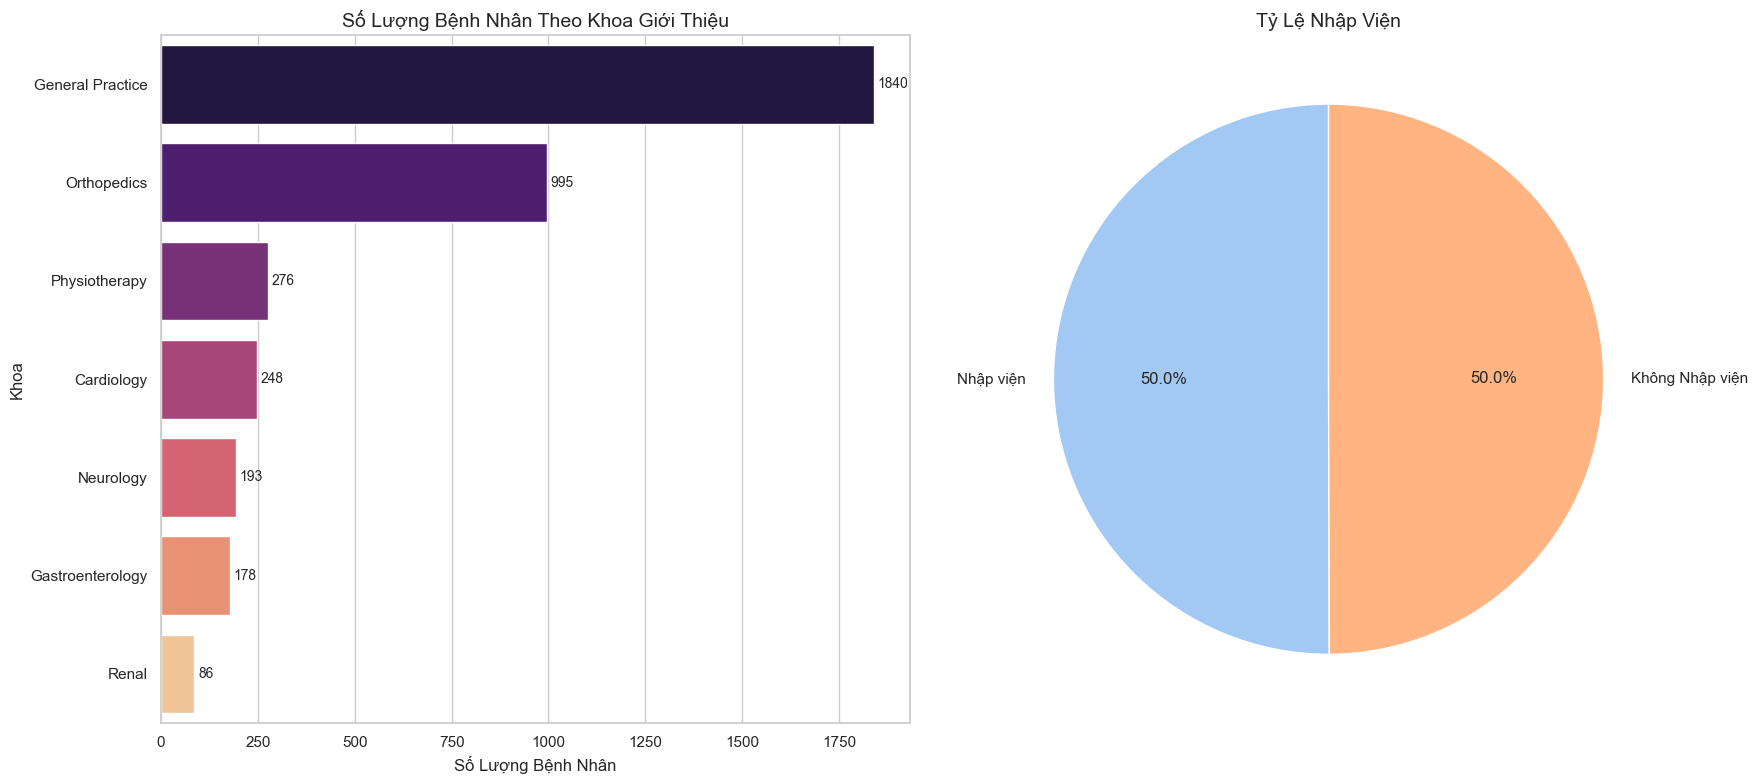

In [54]:
# === BIỂU ĐỒ VỀ KHOA VÀ TỶ LỆ NHẬP VIỆN ===

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# 1. Biểu đồ cột ngang: Số lượng bệnh nhân theo Khoa
patients_by_department = df['department_referral'].value_counts()
sns.barplot(y=patients_by_department.index, x=patients_by_department.values, palette='magma', ax=axes[0])
axes[0].set_title('Số Lượng Bệnh Nhân Theo Khoa Giới Thiệu', fontsize=14)
axes[0].set_xlabel('Số Lượng Bệnh Nhân', fontsize=12)
axes[0].set_ylabel('Khoa', fontsize=12)

# Thêm nhãn số liệu
for index, value in enumerate(patients_by_department):
    axes[0].text(value + 10, index, str(value), ha='left', va='center', fontsize=10)

# 2. Biểu đồ tròn: Tỷ lệ bệnh nhân Nhập viện vs. Không nhập viện
admissions = df['patient_admission_flag'].value_counts()
labels = ['Nhập viện' if i else 'Không Nhập viện' for i in admissions.index]
axes[1].pie(admissions, labels=labels, autopct='%1.1f%%', startangle=90,
            colors=sns.color_palette('pastel'), wedgeprops={'edgecolor': 'white'})
axes[1].set_title('Tỷ Lệ Nhập Viện', fontsize=14)

plt.tight_layout()
plt.show()

## 5. Phân tích chi tiết theo Thời gian

Kết hợp thông tin theo tháng với các nhóm tuổi để theo dõi xu hướng.

In [56]:
# === 5.1. Thống kê chi tiết theo tháng và nhóm tuổi ===
# Ghi chú: Tạo một bảng tổng hợp để theo dõi các chỉ số theo từng tháng và nhóm tuổi.

df['visit_year'] = df['patient_admission_date'].dt.year
df['visit_month'] = df['patient_admission_date'].dt.month

# Đảm bảo cột 'age_group' là kiểu Categorical để sắp xếp đúng
df['age_group'] = pd.Categorical(df['age_group'], categories=age_labels, ordered=True)

# Gom nhóm và tổng hợp dữ liệu
monthly_stats = df.groupby(['visit_year', 'visit_month', 'age_group'], observed=False).agg(
    total_patients=('patient_id', 'count'),
    admitted=('patient_admission_flag', 'sum'),
    average_wait_time=('patient_waittime', 'mean')
).reset_index()

# Tính số bệnh nhân không nhập viện
monthly_stats['not_admitted'] = monthly_stats['total_patients'] - monthly_stats['admitted']

# Làm tròn thời gian chờ
monthly_stats['average_wait_time'] = monthly_stats['average_wait_time'].round(1)

# Loại bỏ các nhóm không có bệnh nhân (nếu có)
monthly_stats = monthly_stats[monthly_stats['total_patients'] > 0].reset_index(drop=True)

print("\n--- Bảng thống kê chi tiết theo tháng và nhóm tuổi ---")
display(monthly_stats.head())


--- Bảng thống kê chi tiết theo tháng và nhóm tuổi ---


,visit_year,visit_month,age_group,total_patients,admitted,average_wait_time,not_admitted
0,2023,4,Children (0-12),86,40,34.6,46
1,2023,4,Teenagers (13-19),47,26,35.8,21
2,2023,4,Young Adults (20-39),121,64,35.6,57
3,2023,4,Middle-aged (40-59),97,48,35.4,49
4,2023,4,Seniors (60+),128,59,33.7,69


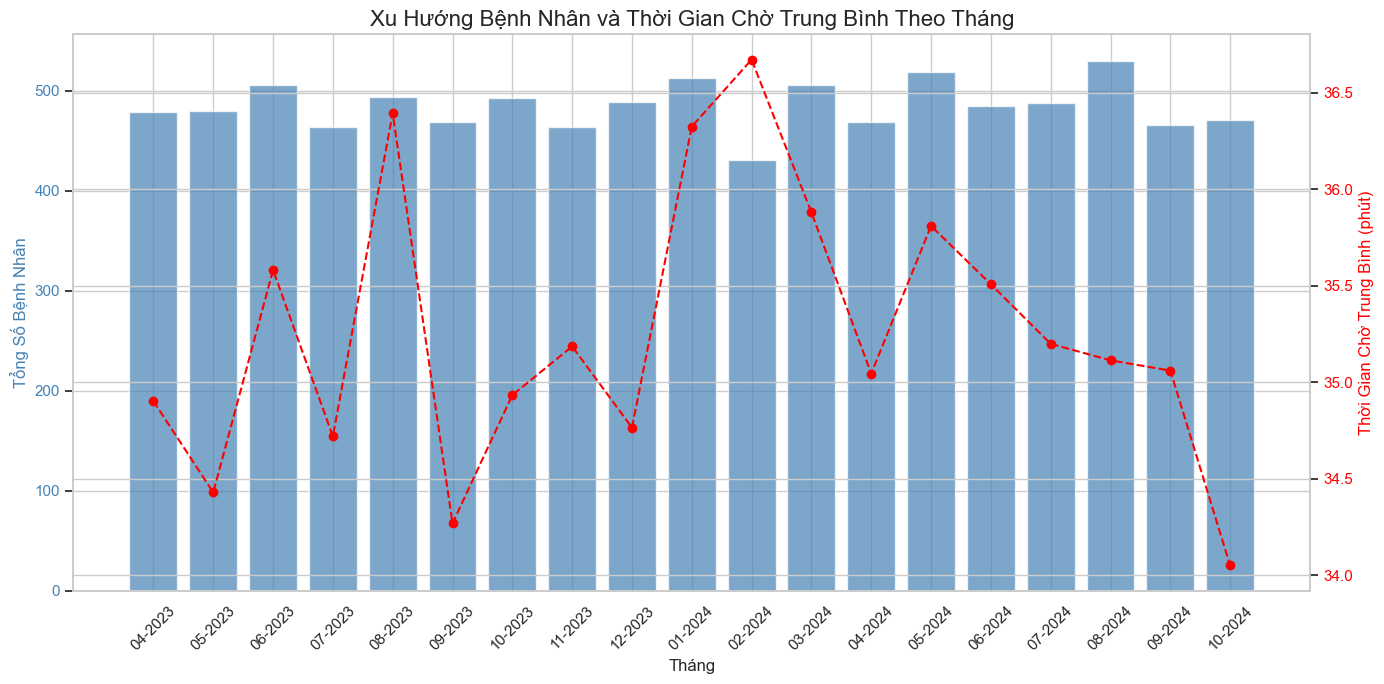

In [57]:
# === 5.2. Trực quan hóa Xu hướng theo tháng ===
# Ghi chú: Biểu đồ trục kép thể hiện mối quan hệ giữa tổng số bệnh nhân và thời gian chờ trung bình qua các tháng.

# Chuẩn bị dữ liệu tóm tắt theo tháng
monthly_summary = df.groupby(['visit_year', 'visit_month']).agg(
    total_patients=('patient_id', 'count'),
    average_wait_time=('patient_waittime', 'mean')
).reset_index()

# Tạo nhãn tháng-năm để hiển thị trên trục x
monthly_summary['month_label'] = monthly_summary.apply(lambda row: f"{int(row['visit_month']):02d}-{int(row['visit_year'])}", axis=1)

# Thiết lập biểu đồ trục kép
fig, ax1 = plt.subplots(figsize=(14, 7))

# Trục 1: Biểu đồ cột cho tổng số bệnh nhân
color1 = 'steelblue'
ax1.set_xlabel('Tháng', fontsize=12)
ax1.set_ylabel('Tổng Số Bệnh Nhân', fontsize=12, color=color1)
ax1.bar(monthly_summary['month_label'], monthly_summary['total_patients'], color=color1, alpha=0.7, label='Tổng Bệnh Nhân')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.tick_params(axis='x', rotation=45)

# Trục 2: Biểu đồ đường cho thời gian chờ trung bình
color2 = 'red'
ax2 = ax1.twinx()
ax2.set_ylabel('Thời Gian Chờ Trung Bình (phút)', fontsize=12, color=color2)
ax2.plot(monthly_summary['month_label'], monthly_summary['average_wait_time'], color=color2, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color2)

# Tiêu đề và layout
plt.title('Xu Hướng Bệnh Nhân và Thời Gian Chờ Trung Bình Theo Tháng', fontsize=16)
fig.tight_layout()
plt.show()